In [39]:
import pandas as pd

In [40]:
cd ~/workspace/theislab/mubind-pipeline/notebooks/pipeline/02_results

/mnt/c/Users/IgnacioIbarra/Dropbox/workspace/theislab/mubind-pipeline/notebooks/pipeline/02_results


In [41]:
df = pd.read_csv('../results_scbasset.csv',
                 index_col=0)
df

,dataset,feat_selection,loss_key,group,metric,value,model_path,n_obs,time,model,n_epochs
0,noack_2022,random,poisson,train,roc_auc,NaN,/mnt/f/workspace/theislab/mubind/data/noack_20...,500,187.031928,scBasset,10
1,noack_2022,random,poisson,train,pr_auc,NaN,/mnt/f/workspace/theislab/mubind/data/noack_20...,500,187.031928,scBasset,10
2,noack_2022,random,poisson,train,r2,0.075192,/mnt/f/workspace/theislab/mubind/data/noack_20...,500,187.031928,scBasset,10
3,noack_2022,random,poisson,val,roc_auc,0.698906,/mnt/f/workspace/theislab/mubind/data/noack_20...,500,187.031928,scBasset,10
4,noack_2022,random,poisson,val,pr_auc,0.194494,/mnt/f/workspace/theislab/mubind/data/noack_20...,500,187.031928,scBasset,10
...,...,...,...,...,...,...,...,...,...,...,...
4,pbmc,episcanpy,bce,val,pr_auc,0.568809,/mnt/f/workspace/theislab/mubind/data/pbmc/epi...,NaN,NaN,scBasset,20
5,pbmc,episcanpy,bce,val,r2,-0.027791,/mnt/f/workspace/theislab/mubind/data/pbmc/epi...,NaN,NaN,scBasset,20
6,pbmc,episcanpy,bce,test,roc_auc,0.603354,/mnt/f/workspace/theislab/mubind/data/pbmc/epi...,NaN,NaN,scBasset,20
7,pbmc,episcanpy,bce,test,pr_auc,0.588223,/mnt/f/workspace/theislab/mubind/data/pbmc/epi...,NaN,NaN,scBasset,20


In [42]:
df_mubind = pd.read_csv('../results_mubind.csv',
                 index_col=0)

In [43]:
import numpy as np
import seaborn as sns
res = pd.concat([df, df_mubind])
res['k'] = np.where(res['model'] == 'scBasset',
                    res['dataset'] + ':' + res['feat_selection'] + ':' + res['loss_key'] + ':' + res['model'],
                    res['dataset'] + ':' + res['feat_selection'] + ':' + res['model'])

In [44]:
df_mubind

,dataset,group,feat_selection,metric,value,time,model_path,n_obs,model
0,noack_2022,train,mubind_output,roc_auc,0.528740,483.511847,/mnt/f/workspace/theislab/mubind/data/noack_20...,500,mubind
1,noack_2022,train,mubind_output,pr_auc,0.081487,483.511847,/mnt/f/workspace/theislab/mubind/data/noack_20...,500,mubind
2,noack_2022,train,mubind_output,r2,0.180875,483.511847,/mnt/f/workspace/theislab/mubind/data/noack_20...,500,mubind
3,noack_2022,val,mubind_output,roc_auc,0.499457,483.511847,/mnt/f/workspace/theislab/mubind/data/noack_20...,500,mubind
4,noack_2022,val,mubind_output,pr_auc,0.073926,483.511847,/mnt/f/workspace/theislab/mubind/data/noack_20...,500,mubind
...,...,...,...,...,...,...,...,...,...
4,pbmc,val,mubind_output,pr_auc,0.003381,436.836211,/mnt/f/workspace/theislab/mubind/data/pbmc/epi...,500,mubind
5,pbmc,val,mubind_output,r2,-0.005626,436.836211,/mnt/f/workspace/theislab/mubind/data/pbmc/epi...,500,mubind
6,pbmc,test,mubind_output,roc_auc,0.605923,436.836211,/mnt/f/workspace/theislab/mubind/data/pbmc/epi...,500,mubind
7,pbmc,test,mubind_output,pr_auc,0.004561,436.836211,/mnt/f/workspace/theislab/mubind/data/pbmc/epi...,500,mubind


In [45]:
res['k'] = np.where(res['model'] == 'scBasset',
                    res['model'] + ':' + res['feat_selection'] + ':' + res['loss_key'],
                    res['model'] + ':' + res['feat_selection'])

list(res[(res['k'] == 'scBasset:random:bce') & (res['dataset'] == 'pancreatic_endocrinogenesis') & (res['metric'] == 'roc_auc') & (res['n_obs'] == 500)]['model_path']) # .value_counts()

[]

In [46]:
res[res['model_path'] == '/mnt/f/workspace/theislab/mubind/data/noack_2022/random/scbasset_output/obs500_e10/bce/best_model.h5']

,dataset,feat_selection,loss_key,group,metric,value,model_path,n_obs,time,model,n_epochs,k
0,noack_2022,random,bce,train,roc_auc,0.741921,/mnt/f/workspace/theislab/mubind/data/noack_20...,500,222.65178,scBasset,10.0,scBasset:random:bce
1,noack_2022,random,bce,train,pr_auc,0.229103,/mnt/f/workspace/theislab/mubind/data/noack_20...,500,222.65178,scBasset,10.0,scBasset:random:bce
2,noack_2022,random,bce,train,r2,0.081677,/mnt/f/workspace/theislab/mubind/data/noack_20...,500,222.65178,scBasset,10.0,scBasset:random:bce
3,noack_2022,random,bce,val,roc_auc,0.692284,/mnt/f/workspace/theislab/mubind/data/noack_20...,500,222.65178,scBasset,10.0,scBasset:random:bce
4,noack_2022,random,bce,val,pr_auc,0.199333,/mnt/f/workspace/theislab/mubind/data/noack_20...,500,222.65178,scBasset,10.0,scBasset:random:bce
5,noack_2022,random,bce,val,r2,0.052111,/mnt/f/workspace/theislab/mubind/data/noack_20...,500,222.65178,scBasset,10.0,scBasset:random:bce
6,noack_2022,random,bce,test,roc_auc,0.665801,/mnt/f/workspace/theislab/mubind/data/noack_20...,500,222.65178,scBasset,10.0,scBasset:random:bce
7,noack_2022,random,bce,test,pr_auc,0.145950,/mnt/f/workspace/theislab/mubind/data/noack_20...,500,222.65178,scBasset,10.0,scBasset:random:bce
8,noack_2022,random,bce,test,r2,0.038973,/mnt/f/workspace/theislab/mubind/data/noack_20...,500,222.65178,scBasset,10.0,scBasset:random:bce


In [47]:
res[res['n_obs'] == '100']

,dataset,feat_selection,loss_key,group,metric,value,model_path,n_obs,time,model,n_epochs,k
0,pancreatic_endocrinogenesis,random,poisson,train,roc_auc,0.509259,/mnt/f/workspace/theislab/mubind/data/pancreat...,100,15.634558,scBasset,1.0,scBasset:random:poisson
1,pancreatic_endocrinogenesis,random,poisson,train,pr_auc,0.054950,/mnt/f/workspace/theislab/mubind/data/pancreat...,100,15.634558,scBasset,1.0,scBasset:random:poisson
2,pancreatic_endocrinogenesis,random,poisson,train,r2,-2.989757,/mnt/f/workspace/theislab/mubind/data/pancreat...,100,15.634558,scBasset,1.0,scBasset:random:poisson
3,pancreatic_endocrinogenesis,random,poisson,val,roc_auc,0.495405,/mnt/f/workspace/theislab/mubind/data/pancreat...,100,15.634558,scBasset,1.0,scBasset:random:poisson
4,pancreatic_endocrinogenesis,random,poisson,val,pr_auc,0.103700,/mnt/f/workspace/theislab/mubind/data/pancreat...,100,15.634558,scBasset,1.0,scBasset:random:poisson
...,...,...,...,...,...,...,...,...,...,...,...,...
4,pancreatic_endocrinogenesis,episcanpy,bce,val,pr_auc,0.673864,/mnt/f/workspace/theislab/mubind/data/pancreat...,100,187.291645,scBasset,20.0,scBasset:episcanpy:bce
5,pancreatic_endocrinogenesis,episcanpy,bce,val,r2,-0.006776,/mnt/f/workspace/theislab/mubind/data/pancreat...,100,187.291645,scBasset,20.0,scBasset:episcanpy:bce
6,pancreatic_endocrinogenesis,episcanpy,bce,test,roc_auc,0.653421,/mnt/f/workspace/theislab/mubind/data/pancreat...,100,187.291645,scBasset,20.0,scBasset:episcanpy:bce
7,pancreatic_endocrinogenesis,episcanpy,bce,test,pr_auc,0.632552,/mnt/f/workspace/theislab/mubind/data/pancreat...,100,187.291645,scBasset,20.0,scBasset:episcanpy:bce


In [48]:
# decoy max - fix for ms release
# res['n_obs'] = np.where(res['n_obs'] == 'ALL', res['n_obs'][res['n_obs'] != 'ALL'].astype(int).max() * 3, res['n_obs'])
# res['n_obs'] = res['n_obs'].astype(int)

In [49]:
print(res['model'].value_counts())

model
scBasset    1458
mubind       216
Name: count, dtype: int64


In [50]:
import warnings
warnings.filterwarnings("ignore")


In [56]:
res[res['model'] == 'mubind']

,dataset,feat_selection,loss_key,group,metric,value,model_path,n_obs,time,model,n_epochs,k
0,noack_2022,mubind_output,NaN,train,roc_auc,0.528740,/mnt/f/workspace/theislab/mubind/data/noack_20...,500,483.511847,mubind,NaN,mubind:mubind_output
1,noack_2022,mubind_output,NaN,train,pr_auc,0.081487,/mnt/f/workspace/theislab/mubind/data/noack_20...,500,483.511847,mubind,NaN,mubind:mubind_output
2,noack_2022,mubind_output,NaN,train,r2,0.180875,/mnt/f/workspace/theislab/mubind/data/noack_20...,500,483.511847,mubind,NaN,mubind:mubind_output
3,noack_2022,mubind_output,NaN,val,roc_auc,0.499457,/mnt/f/workspace/theislab/mubind/data/noack_20...,500,483.511847,mubind,NaN,mubind:mubind_output
4,noack_2022,mubind_output,NaN,val,pr_auc,0.073926,/mnt/f/workspace/theislab/mubind/data/noack_20...,500,483.511847,mubind,NaN,mubind:mubind_output
...,...,...,...,...,...,...,...,...,...,...,...,...
4,pbmc,mubind_output,NaN,val,pr_auc,0.003381,/mnt/f/workspace/theislab/mubind/data/pbmc/epi...,500,436.836211,mubind,NaN,mubind:mubind_output
5,pbmc,mubind_output,NaN,val,r2,-0.005626,/mnt/f/workspace/theislab/mubind/data/pbmc/epi...,500,436.836211,mubind,NaN,mubind:mubind_output
6,pbmc,mubind_output,NaN,test,roc_auc,0.605923,/mnt/f/workspace/theislab/mubind/data/pbmc/epi...,500,436.836211,mubind,NaN,mubind:mubind_output
7,pbmc,mubind_output,NaN,test,pr_auc,0.004561,/mnt/f/workspace/theislab/mubind/data/pbmc/epi...,500,436.836211,mubind,NaN,mubind:mubind_output


In [59]:
res

,dataset,feat_selection,loss_key,group,metric,value,model_path,n_obs,time,model,n_epochs,k
0,noack_2022,random,poisson,train,roc_auc,NaN,/mnt/f/workspace/theislab/mubind/data/noack_20...,500,187.031928,scBasset,10.0,scBasset:random:poisson
1,noack_2022,random,poisson,train,pr_auc,NaN,/mnt/f/workspace/theislab/mubind/data/noack_20...,500,187.031928,scBasset,10.0,scBasset:random:poisson
2,noack_2022,random,poisson,train,r2,0.075192,/mnt/f/workspace/theislab/mubind/data/noack_20...,500,187.031928,scBasset,10.0,scBasset:random:poisson
3,noack_2022,random,poisson,val,roc_auc,0.698906,/mnt/f/workspace/theislab/mubind/data/noack_20...,500,187.031928,scBasset,10.0,scBasset:random:poisson
4,noack_2022,random,poisson,val,pr_auc,0.194494,/mnt/f/workspace/theislab/mubind/data/noack_20...,500,187.031928,scBasset,10.0,scBasset:random:poisson
...,...,...,...,...,...,...,...,...,...,...,...,...
4,pbmc,mubind_output,NaN,val,pr_auc,0.003381,/mnt/f/workspace/theislab/mubind/data/pbmc/epi...,500,436.836211,mubind,NaN,mubind:mubind_output
5,pbmc,mubind_output,NaN,val,r2,-0.005626,/mnt/f/workspace/theislab/mubind/data/pbmc/epi...,500,436.836211,mubind,NaN,mubind:mubind_output
6,pbmc,mubind_output,NaN,test,roc_auc,0.605923,/mnt/f/workspace/theislab/mubind/data/pbmc/epi...,500,436.836211,mubind,NaN,mubind:mubind_output
7,pbmc,mubind_output,NaN,test,pr_auc,0.004561,/mnt/f/workspace/theislab/mubind/data/pbmc/epi...,500,436.836211,mubind,NaN,mubind:mubind_output


In [67]:
res['feat_selection'] = np.where(res['model'] == 'mubind', res['model_path'].str.split('/').str[-5], res['feat_selection'])
res

,dataset,feat_selection,loss_key,group,metric,value,model_path,n_obs,time,model,n_epochs,k
0,noack_2022,random,poisson,train,roc_auc,NaN,/mnt/f/workspace/theislab/mubind/data/noack_20...,500,187.031928,scBasset,10.0,scBasset:random:poisson
1,noack_2022,random,poisson,train,pr_auc,NaN,/mnt/f/workspace/theislab/mubind/data/noack_20...,500,187.031928,scBasset,10.0,scBasset:random:poisson
2,noack_2022,random,poisson,train,r2,0.075192,/mnt/f/workspace/theislab/mubind/data/noack_20...,500,187.031928,scBasset,10.0,scBasset:random:poisson
3,noack_2022,random,poisson,val,roc_auc,0.698906,/mnt/f/workspace/theislab/mubind/data/noack_20...,500,187.031928,scBasset,10.0,scBasset:random:poisson
4,noack_2022,random,poisson,val,pr_auc,0.194494,/mnt/f/workspace/theislab/mubind/data/noack_20...,500,187.031928,scBasset,10.0,scBasset:random:poisson
...,...,...,...,...,...,...,...,...,...,...,...,...
4,pbmc,episcanpy,NaN,val,pr_auc,0.003381,/mnt/f/workspace/theislab/mubind/data/pbmc/epi...,500,436.836211,mubind,NaN,mubind:mubind_output
5,pbmc,episcanpy,NaN,val,r2,-0.005626,/mnt/f/workspace/theislab/mubind/data/pbmc/epi...,500,436.836211,mubind,NaN,mubind:mubind_output
6,pbmc,episcanpy,NaN,test,roc_auc,0.605923,/mnt/f/workspace/theislab/mubind/data/pbmc/epi...,500,436.836211,mubind,NaN,mubind:mubind_output
7,pbmc,episcanpy,NaN,test,pr_auc,0.004561,/mnt/f/workspace/theislab/mubind/data/pbmc/epi...,500,436.836211,mubind,NaN,mubind:mubind_output


noack_2022 train


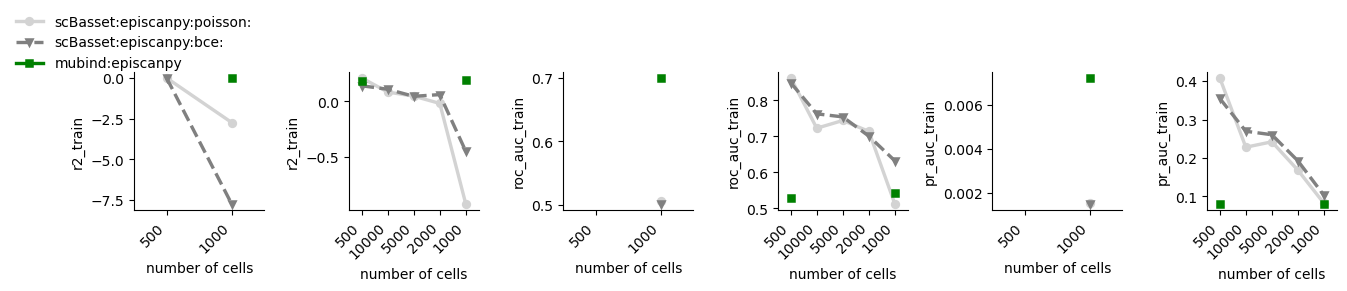

noack_2022 test


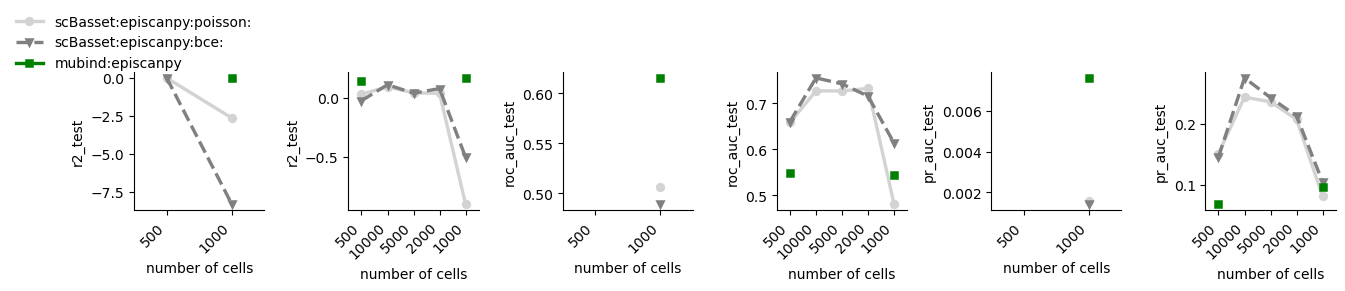

pancreatic_endocrinogenesis train


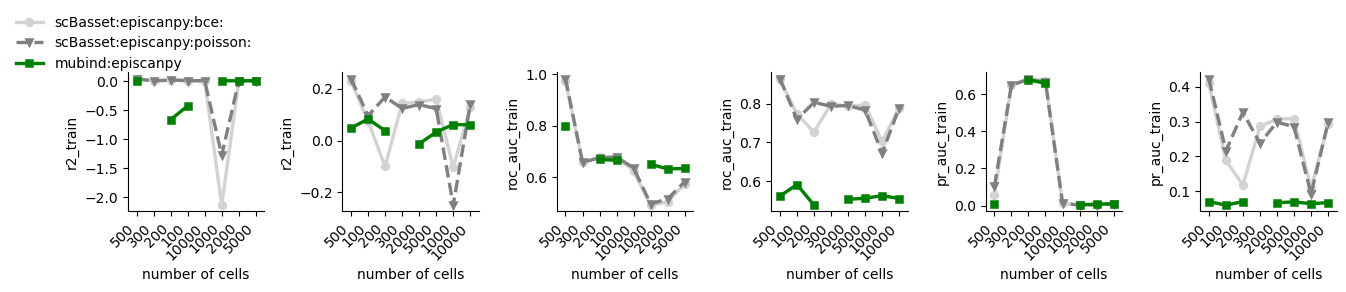

pancreatic_endocrinogenesis test


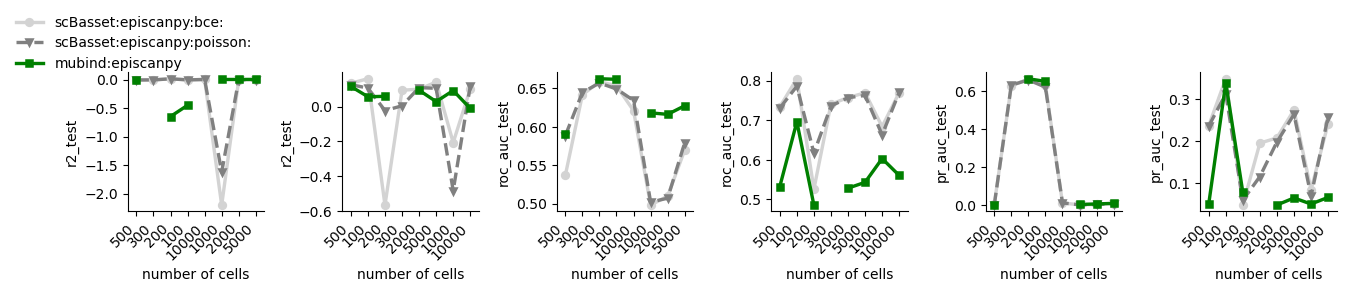

pbmc train


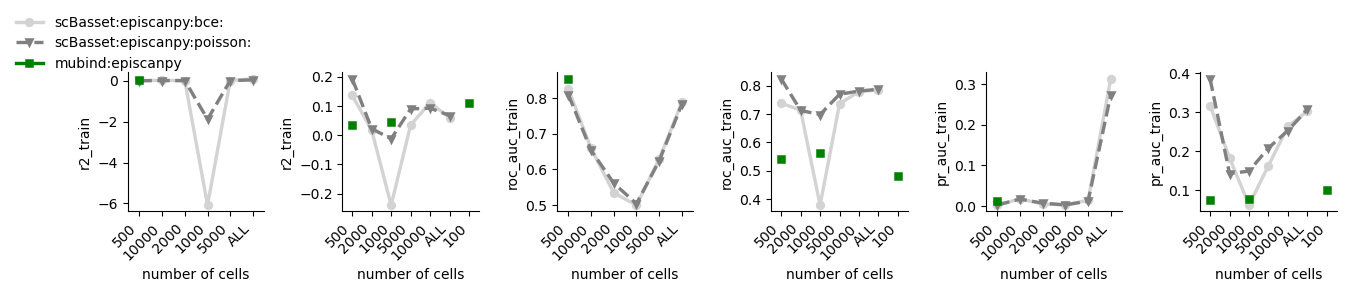

pbmc test


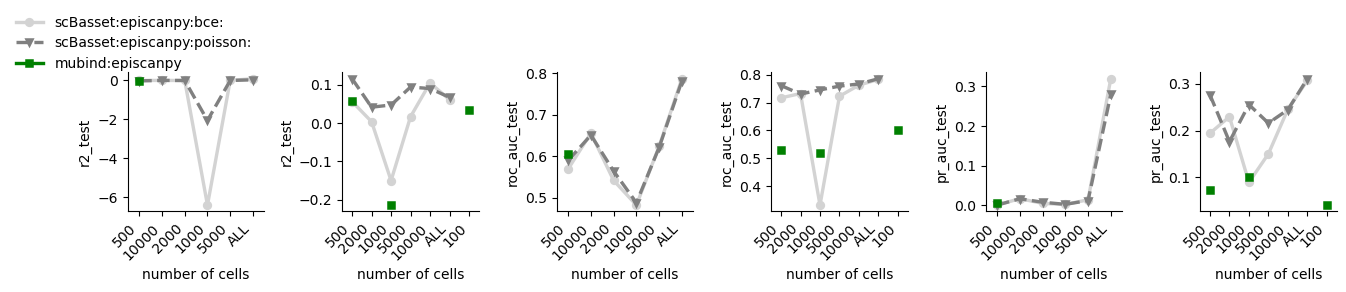

In [75]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 20, 3

for dataset_id, grp in res.groupby('dataset'):
    for group in ['train', 'test']:
        print(dataset_id, group)
        pi = 0
        for metric in ['r2', 'roc_auc', 'pr_auc']:
            for k, grp2 in grp[(grp['group'] == group) & (grp['metric'] == metric)].groupby('feat_selection'):
                # print(metric, k)
                # print(grp2['model'].value_counts())
                # if k[-1] != 'test':
                #     continue
                # print(grp2['model'].value_counts())
                grp2['k'] = np.where(grp2['model'] == 'scBasset',
                                    grp2['model'] + ':' + grp2['feat_selection'] + ':' + grp2['loss_key'] + ':',
                                    grp2['model'] + ':' + grp2['feat_selection'])

                grp2['k2'] = grp2['k'] + ':' + grp2['n_obs'].astype(str)

                grp2 = grp2.sort_values('n_epochs', ascending=False).groupby('k2').head(1)

                ax = plt.subplot(1, 9, pi + 1)
                # print(k, grp.shape)

                # print(grp)

                # only keep the models with the highest number of epochs (scBasset)
                # grp = grp.sort_values('n_epochs', ascending=False).drop_duplicates('k')
                # print(k, grp2.shape)
                grp2['k']
                # print(grp)
                # print('')

                # rcParams['figure.figsize'] = 8, 3
                sns.pointplot(grp2.reset_index(drop=True), x='n_obs', y='value', hue='k', scale=.9, ax=ax, linestyles=['-', '--', '-'], markers=['o','v', 's'], palette=['lightgray', 'gray', 'green']) 

                                # linestyles=["-", "--"] * 3, color='red') # 'blue', 'blue', 'red', 'red', 'green', 'green'])
                # sns.barplot(data=grp,
                #             x='dataset',
                #             y='value',
                #             ax=ax)
                plt.xticks(rotation=45, ha='right')
                plt.xlabel('number of cells')
                plt.ylabel(metric + '_' + group)
                plt.legend(fontsize=6)
                # plt.title(k + '_' + group + '_' + metric)
                ax.spines[['right', 'top']].set_visible(False)
                ax.legend(loc='upper right', bbox_to_anchor=(1,1.5), frameon=False)
                if pi != 0:
                    ax.get_legend().remove()
                pi += 1
                plt.tight_layout()

        plt.show()

In [69]:
grp2

,dataset,feat_selection,loss_key,group,metric,value,model_path,n_obs,time,model,n_epochs,k,k2
7,pbmc,random,bce,test,pr_auc,0.194198,/mnt/f/workspace/theislab/mubind/data/pbmc/ran...,500,2191.459182,scBasset,100.0,scBasset:random:bce:,scBasset:random:bce::500
7,pbmc,random,poisson,test,pr_auc,0.276353,/mnt/f/workspace/theislab/mubind/data/pbmc/ran...,500,2109.565408,scBasset,100.0,scBasset:random:poisson:,scBasset:random:poisson::500
7,pbmc,random,poisson,test,pr_auc,0.044056,/mnt/f/workspace/theislab/mubind/data/pbmc/ran...,NaN,NaN,scBasset,20.0,scBasset:random:poisson:,scBasset:random:poisson::nan
7,pbmc,random,bce,test,pr_auc,0.050145,/mnt/f/workspace/theislab/mubind/data/pbmc/ran...,NaN,NaN,scBasset,20.0,scBasset:random:bce:,scBasset:random:bce::nan
7,pbmc,random,bce,test,pr_auc,0.229561,/mnt/f/workspace/theislab/mubind/data/pbmc/ran...,2000,141.343017,scBasset,1.0,scBasset:random:bce:,scBasset:random:bce::2000
7,pbmc,random,poisson,test,pr_auc,0.176453,/mnt/f/workspace/theislab/mubind/data/pbmc/ran...,2000,156.142871,scBasset,1.0,scBasset:random:poisson:,scBasset:random:poisson::2000
7,pbmc,random,bce,test,pr_auc,0.089605,/mnt/f/workspace/theislab/mubind/data/pbmc/ran...,1000,53.021274,scBasset,1.0,scBasset:random:bce:,scBasset:random:bce::1000
7,pbmc,random,poisson,test,pr_auc,0.255410,/mnt/f/workspace/theislab/mubind/data/pbmc/ran...,1000,43.990961,scBasset,1.0,scBasset:random:poisson:,scBasset:random:poisson::1000
7,pbmc,random,bce,test,pr_auc,0.150405,/mnt/f/workspace/theislab/mubind/data/pbmc/ran...,5000,308.278846,scBasset,1.0,scBasset:random:bce:,scBasset:random:bce::5000
7,pbmc,random,poisson,test,pr_auc,0.215876,/mnt/f/workspace/theislab/mubind/data/pbmc/ran...,5000,314.924441,scBasset,1.0,scBasset:random:poisson:,scBasset:random:poisson::5000


In [70]:
# all times are the same


In [71]:
df

,dataset,feat_selection,loss_key,group,metric,value,model_path,n_obs,time,model,n_epochs
0,noack_2022,random,poisson,train,roc_auc,NaN,/mnt/f/workspace/theislab/mubind/data/noack_20...,500,187.031928,scBasset,10
1,noack_2022,random,poisson,train,pr_auc,NaN,/mnt/f/workspace/theislab/mubind/data/noack_20...,500,187.031928,scBasset,10
2,noack_2022,random,poisson,train,r2,0.075192,/mnt/f/workspace/theislab/mubind/data/noack_20...,500,187.031928,scBasset,10
3,noack_2022,random,poisson,val,roc_auc,0.698906,/mnt/f/workspace/theislab/mubind/data/noack_20...,500,187.031928,scBasset,10
4,noack_2022,random,poisson,val,pr_auc,0.194494,/mnt/f/workspace/theislab/mubind/data/noack_20...,500,187.031928,scBasset,10
...,...,...,...,...,...,...,...,...,...,...,...
4,pbmc,episcanpy,bce,val,pr_auc,0.568809,/mnt/f/workspace/theislab/mubind/data/pbmc/epi...,NaN,NaN,scBasset,20
5,pbmc,episcanpy,bce,val,r2,-0.027791,/mnt/f/workspace/theislab/mubind/data/pbmc/epi...,NaN,NaN,scBasset,20
6,pbmc,episcanpy,bce,test,roc_auc,0.603354,/mnt/f/workspace/theislab/mubind/data/pbmc/epi...,NaN,NaN,scBasset,20
7,pbmc,episcanpy,bce,test,pr_auc,0.588223,/mnt/f/workspace/theislab/mubind/data/pbmc/epi...,NaN,NaN,scBasset,20


In [72]:
df = res[res['metric'] == 'roc_auc']
df.shape

(558, 12)

('noack_2022', 'episcanpy', 'test') (13, 12)
('noack_2022', 'random', 'test') (26, 12)
('pancreatic_endocrinogenesis', 'episcanpy', 'test') (43, 12)
('pancreatic_endocrinogenesis', 'random', 'test') (48, 12)
('pbmc', 'episcanpy', 'test') (27, 12)
('pbmc', 'random', 'test') (29, 12)


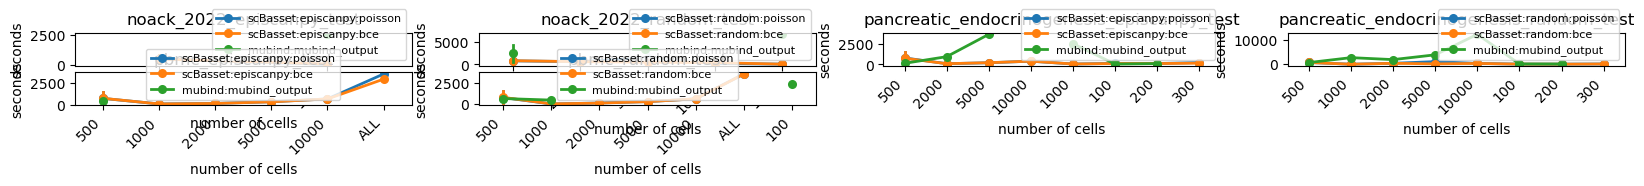

In [73]:
pi = 0
for k, grp in df.groupby(['dataset', 'feat_selection', 'group']):
    if k[-1] != 'test':
        continue
    ax = plt.subplot(6, 4, pi + 1)
    # print(k, grp.shape)

    # print(grp)

    # only keep the models with the highest number of epochs (scBasset)
    # grp = grp.sort_values('n_epochs', ascending=False).drop_duplicates('k')
    print(k, grp.shape)
    # print(grp['model'].value_counts())
    # print(grp)
    # print('')

    # rcParams['figure.figsize'] = 8, 3
    sns.pointplot(grp.reset_index(drop=True), x='n_obs', y='time', hue='k', lw=2) 
                    # linestyles=["-", "--"] * 3, color='red') # 'blue', 'blue', 'red', 'red', 'green', 'green'])
    # sns.barplot(data=grp,
    #             x='dataset',
    #             y='value',
    #             ax=ax)
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('seconds')
    plt.xlabel('number of cells')
    plt.legend(fontsize=8)
    plt.title(str('_'.join(k)))
    pi += 1
    plt.tight_layout()

plt.show()

In [74]:
# running time